Homework 1: https://virtuale.unibo.it/pluginfile.php/1783295/mod_resource/content/1/homework1.pdf

# Direct Methods for the solution of Linear Systems

In [1]:
import numpy as np

#[i] = (n, k2, kinf, err)
plot_data = []

def matrix_analysis(A):
    x_true = np.ones_like(A[:, 0])

    # compute the RHS
    b = A @ x_true

    # compute the condition number in 2-norm of matrix A
    k_2 = np.linalg.cond(A, 2)
    k_inf = np.linalg.cond(A, np.inf)

    # solve the linear system using the function np.linalg.solve
    x = np.linalg.solve(A, b)

    # compute the relative error
    err = np.linalg.norm(x - x_true, 2) / np.linalg.norm(x_true, 2)

    n = A.shape[0]
    plot_data.append([n, k_2, k_inf, err])    

In [2]:
import matplotlib.pyplot as plt

def plot_graph(data):
    plot_src = np.array(data)
    plt.plot(plot_src[:, 0], plot_src[:, 1], label="k_2")
    plt.plot(plot_src[:, 0], plot_src[:, 2], label="k_inf")
    plt.legend()
    plt.show()
    
    plt.plot(plot_src[:, 0], plot_src[:, 3], label="err")
    plt.legend()
    plt.show()

## Random Matrix

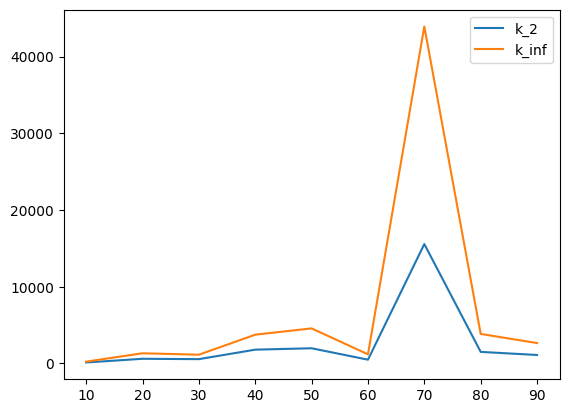

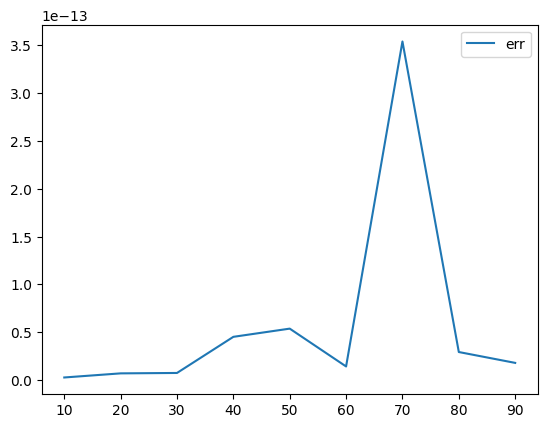

In [3]:
def random_matrix(n):
    A = np.zeros((n, n))
    for i in range(0, n):
        for j in range(0, n):
            A[i, j] = np.random.rand()
    return A

plot_data = []
for i in range(10, 100, 10):
    A = random_matrix(i)
    matrix_analysis(A)
    
plot_graph(plot_data)

## Vandermonde Matrix

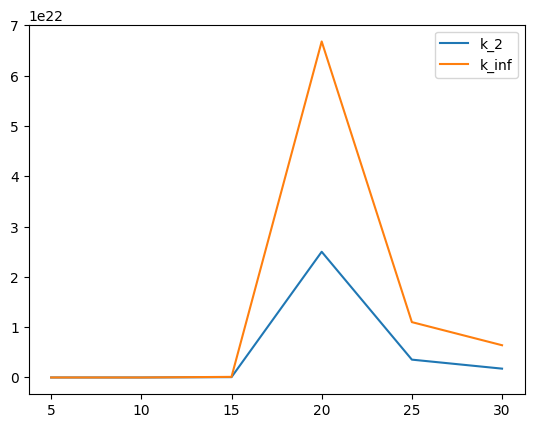

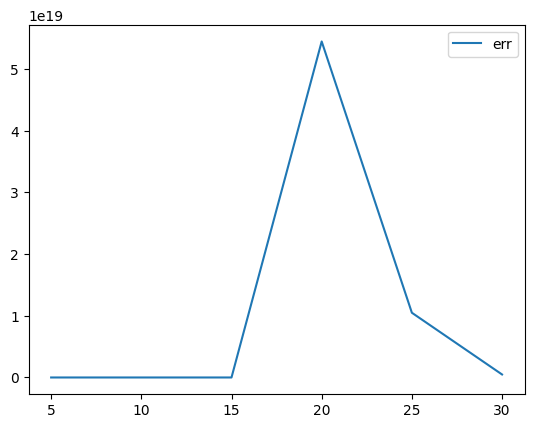

In [4]:
def vandermonde_matrix(n):
    x = range(0, n)
    V = np.vander(x)
    return V

plot_data = []
for i in range(5, 31, 5):
    A = vandermonde_matrix(i)
    matrix_analysis(A)

plot_graph(plot_data)

## Hilbert Matrix

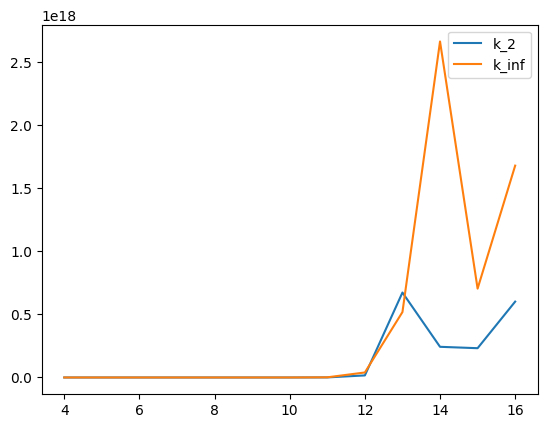

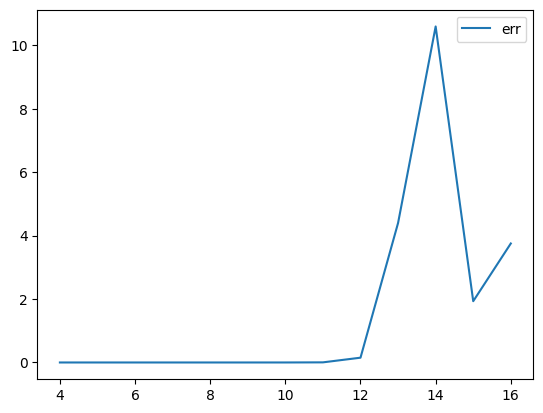

In [5]:
import scipy as sp

def hilbert_matrix(n):
    H = sp.linalg.hilbert(n)
    return H

plot_data = []
for i in range(4, 17):
    A = hilbert_matrix(i)
    matrix_analysis(A)

plot_graph(plot_data)

# Floating Point Arithmetic

In [6]:
# machine epsilon computation

next_eps = 1
eps = next_eps
while 1 + next_eps > 1:
    eps = next_eps
    next_eps /= 2

print(f"Machine epsilon: {eps}")

Machine epsilon: 2.220446049250313e-16


1000000.0
5006012.024048096
9012024.048096191
13018036.072144289
17024048.096192382
21030060.12024048
25036072.144288577
29042084.16833667
33048096.19238477
37054108.21643286
41060120.24048096
45066132.26452906
49072144.288577154
53078156.31262525
57084168.33667334
61090180.36072144
65096192.38476954
69102204.40881763
73108216.43286572
77114228.45691383
81120240.48096192
85126252.50501002
89132264.52905811
93138276.5531062
97144288.57715431
101150300.6012024
105156312.6252505
109162324.6492986
113168336.67334668
117174348.69739479
121180360.72144288
125186372.74549098
129192384.76953907
133198396.79358716
137204408.81763527
141210420.84168336
145216432.86573145
149222444.88977957
153228456.91382766
157234468.93787575
161240480.96192384
165246492.98597193
169252505.01002005
173258517.03406814
177264529.05811623
181270541.08216432
185276553.1062124
189282565.13026053
193288577.15430862
197294589.1783567
201300601.2024048
205306613.2264529
209312625.250501
213318637.2745491
217324649.2985

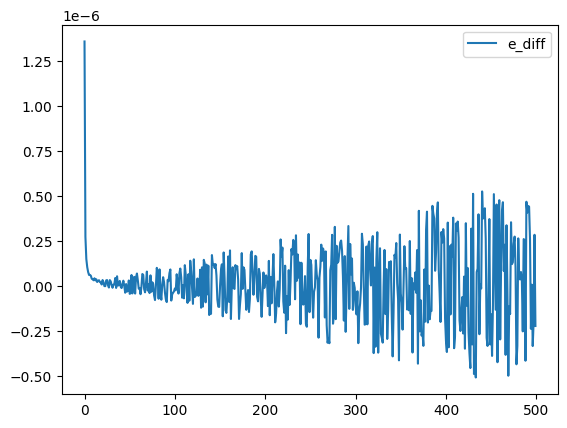

In [7]:
e = 2.71828182845904523

def compute_e(n):
    return (1 + 1/n) ** n

e_diff = []
n = 2_000_000_000
for i in np.linspace(1_000_000, n, 500):
    print(i)
    computed_e = compute_e(i)
    e_diff.append(e - computed_e)

plt.plot(e_diff, label="e_diff")
plt.legend()
plt.show()

In [9]:
A = np.array([[4, 2], [1, 3]])
B = np.array([[4, 2], [2, 1]])

rk_A = np.linalg.matrix_rank(A) # = 2
rk_B = np.linalg.matrix_rank(B) # = 1

eig_A = np.linalg.eigvals(A)    # = [5, 2]
eig_B = np.linalg.eigvals(B)    # = [5, 0]

print(f'Rank of A: {rk_A}\nRank of B: {rk_B}\nEigenvalues of A: {eig_A}\nEigenvalues of B: {eig_B}')

# A is a basis for a 2-dimensional subspace
# of R^2 given its rank is 2 and it has 2 distinct, non-zero eigenvalues

# B on the contrary has a single non-zero eigenvalue,
# so it has rank 1 and it isn't a full-rank matrix

Rank of A: 2
Rank of B: 1
Eigenvalues of A: [5. 2.]
Eigenvalues of B: [5. 0.]
